In [1]:
pip install matplotlib

In [2]:
#importing required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV,RandomizedSearchCV
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set(rc={'figure.figsize':(8,8)})

In [3]:
#reading file
df=pd.read_csv("Final.csv")

In [4]:
#"Converting columns to a list"
columns= df.columns
columns_as_list = columns.tolist()
columns_as_list

['id',
 'name',
 'gender',
 'age',
 'degree',
 'stream',
 'college_name',
 'placement_status',
 'salary',
 'gpa',
 'years_of_experience',
 'Research Papers',
 'Co-Ops',
 'Technical Skills']

In [5]:
# Calculate the mean
mean = df.mean()
print("Mean:")
print(mean)

Mean:
id                       350.500000
age                       24.410330
salary                 54772.857143
gpa                        3.802201
years_of_experience        2.177905
Research Papers            2.011478
Co-Ops                     1.992837
Technical Skills           2.924069
dtype: float64


C:\Users\Vaishali\AppData\Local\Temp\ipykernel_7004\861025332.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean = df.mean()


In [6]:
# Calculate the median
median = df.median()
print("\nMedian:")
print(median)


Median:
id                       350.50
age                       24.00
salary                 61000.00
gpa                        3.81
years_of_experience        2.00
Research Papers            2.00
Co-Ops                     2.00
Technical Skills           3.00
dtype: float64


C:\Users\Vaishali\AppData\Local\Temp\ipykernel_7004\705288829.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  median = df.median()


In [7]:
# Calculate the mode
mode = df.mode().iloc[0]
print("\nMode:")
print(mode)


Mode:
id                                                      1
name                                          Aiden Davis
gender                                             Female
age                                                  24.0
degree                                         Bachelor's
stream                                   Computer Science
college_name           University of California--Berkeley
placement_status                                   Placed
salary                                                0.0
gpa                                                  3.77
years_of_experience                                   3.0
Research Papers                                       3.0
Co-Ops                                                1.0
Technical Skills                                      2.0
Name: 0, dtype: object


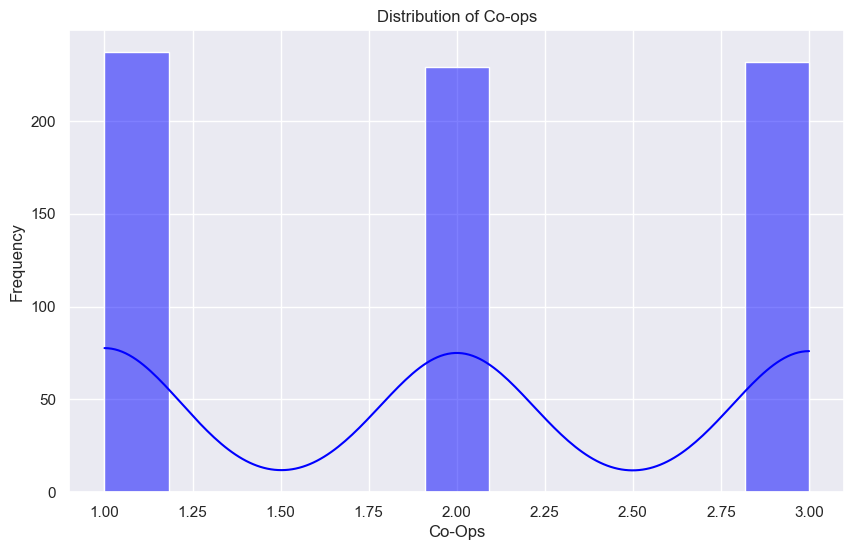

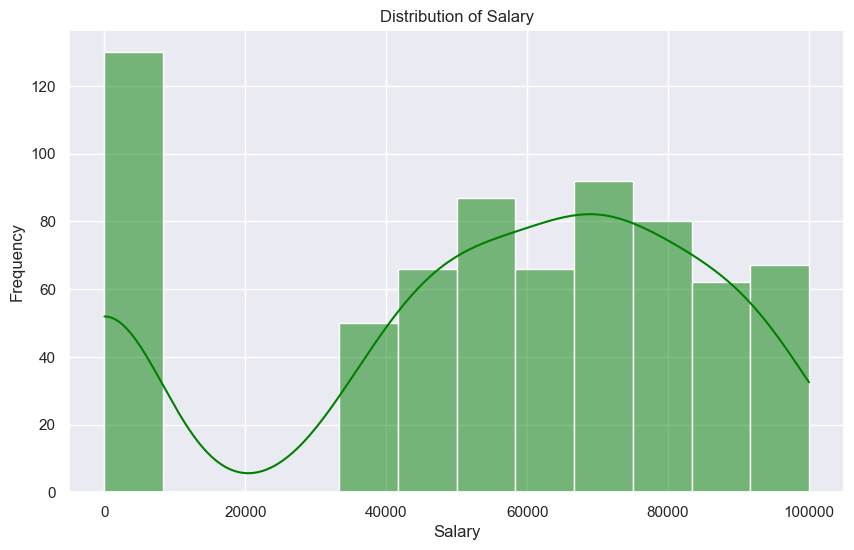

In [8]:
# Plot the histogram for age column
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Co-Ops', kde=True, color='blue')
plt.title('Distribution of Co-ops')
plt.xlabel('Co-Ops')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot the histogram for salary column
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='salary', kde=True, color='green')
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

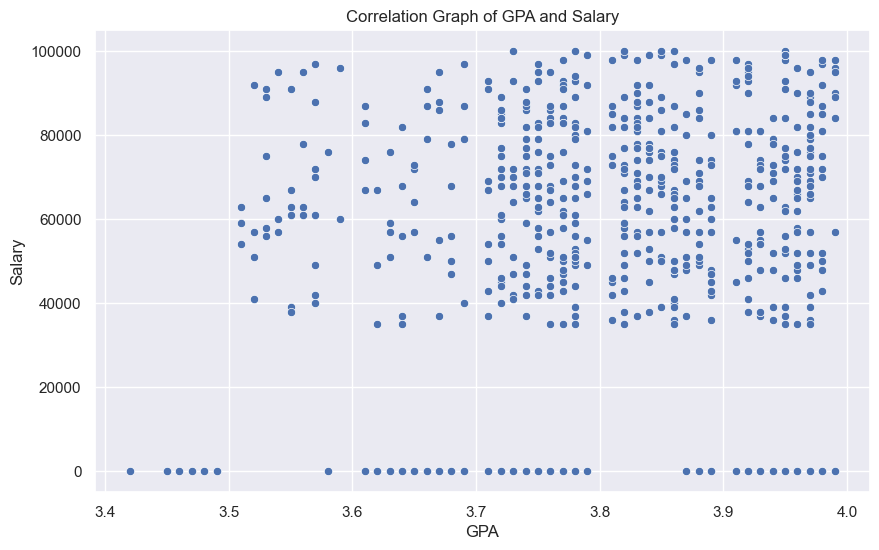

In [9]:
# Plot the correlation graph
plt.figure(figsize=(10, 6))
sns.scatterplot(x='gpa', y='salary', data=df)
plt.title('Correlation Graph of GPA and Salary')
plt.xlabel('GPA')
plt.ylabel('Salary')
plt.show()


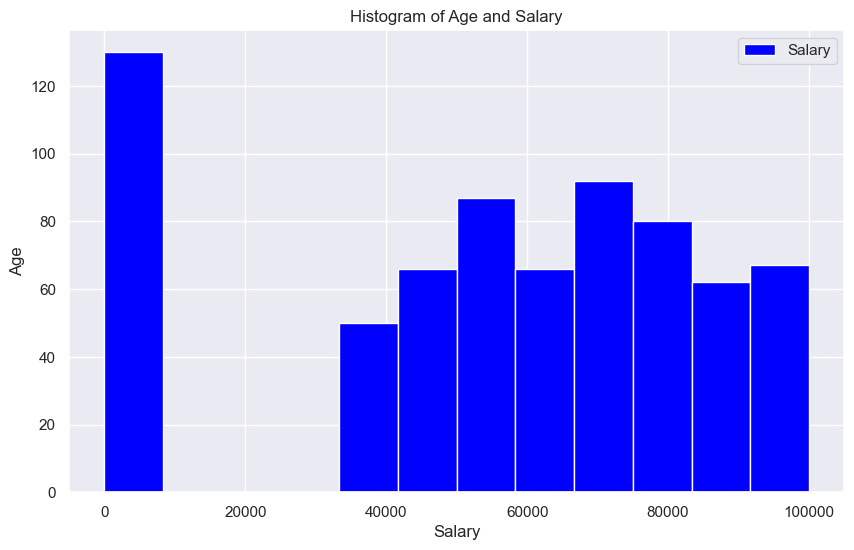

In [10]:
# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='salary', color='blue', alpha=1, label='Salary')

plt.title('Histogram of Age and Salary')
plt.xlabel('Salary')
plt.ylabel('Age')
plt.legend()
plt.show()

C:\Users\Vaishali\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


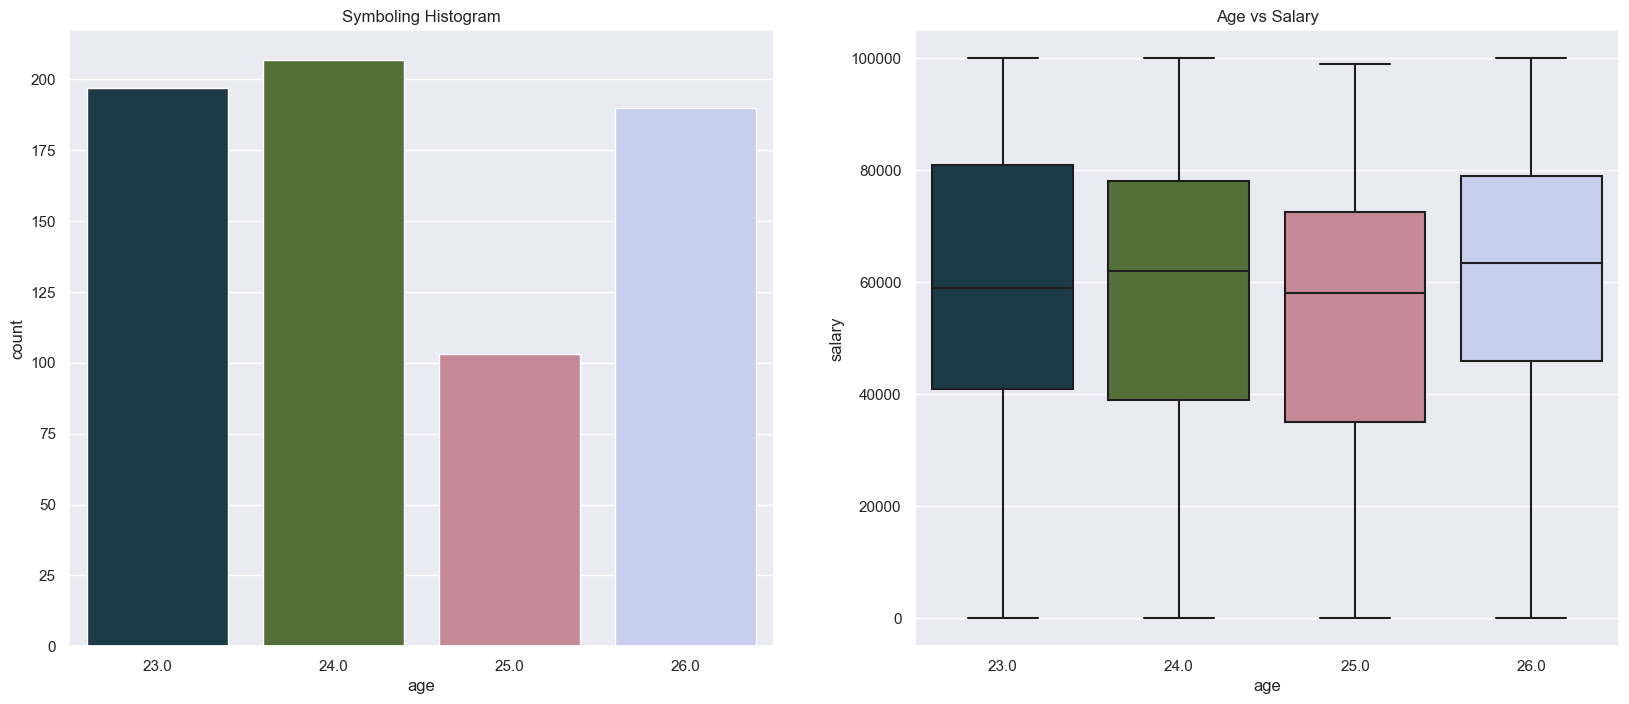

In [11]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Symboling Histogram')
sns.countplot(df.age, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Age vs Salary')
sns.boxplot(x=df.age, y=df.salary, palette=("cubehelix"))

plt.show()

C:\Users\Vaishali\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


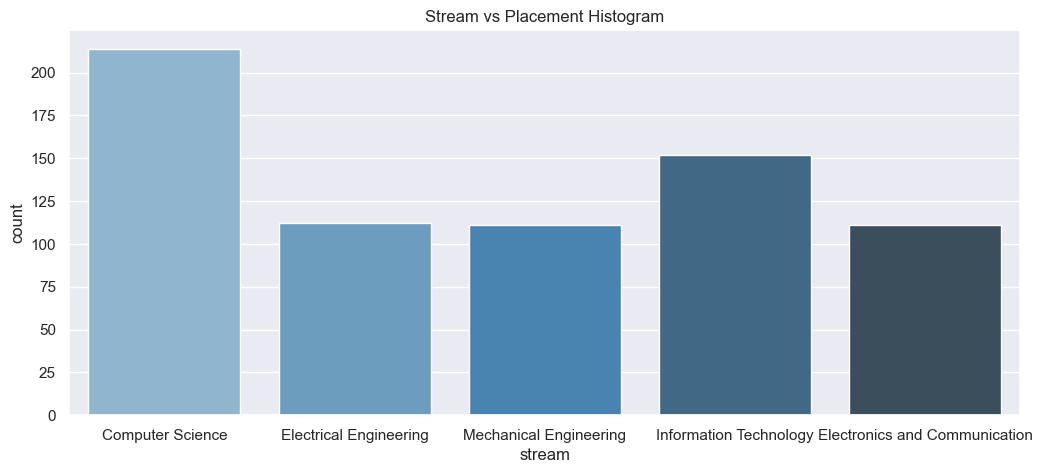

In [12]:
plt.figure(figsize=(27, 5))  # You can adjust the width and height as needed


plt.subplot(1, 2, 1)
plt.title('Stream vs Placement Histogram')


sns.countplot(df.stream, palette=("Blues_d"))

plt.show()

C:\Users\Vaishali\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Vaishali\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Vaishali\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Vaishali\anac

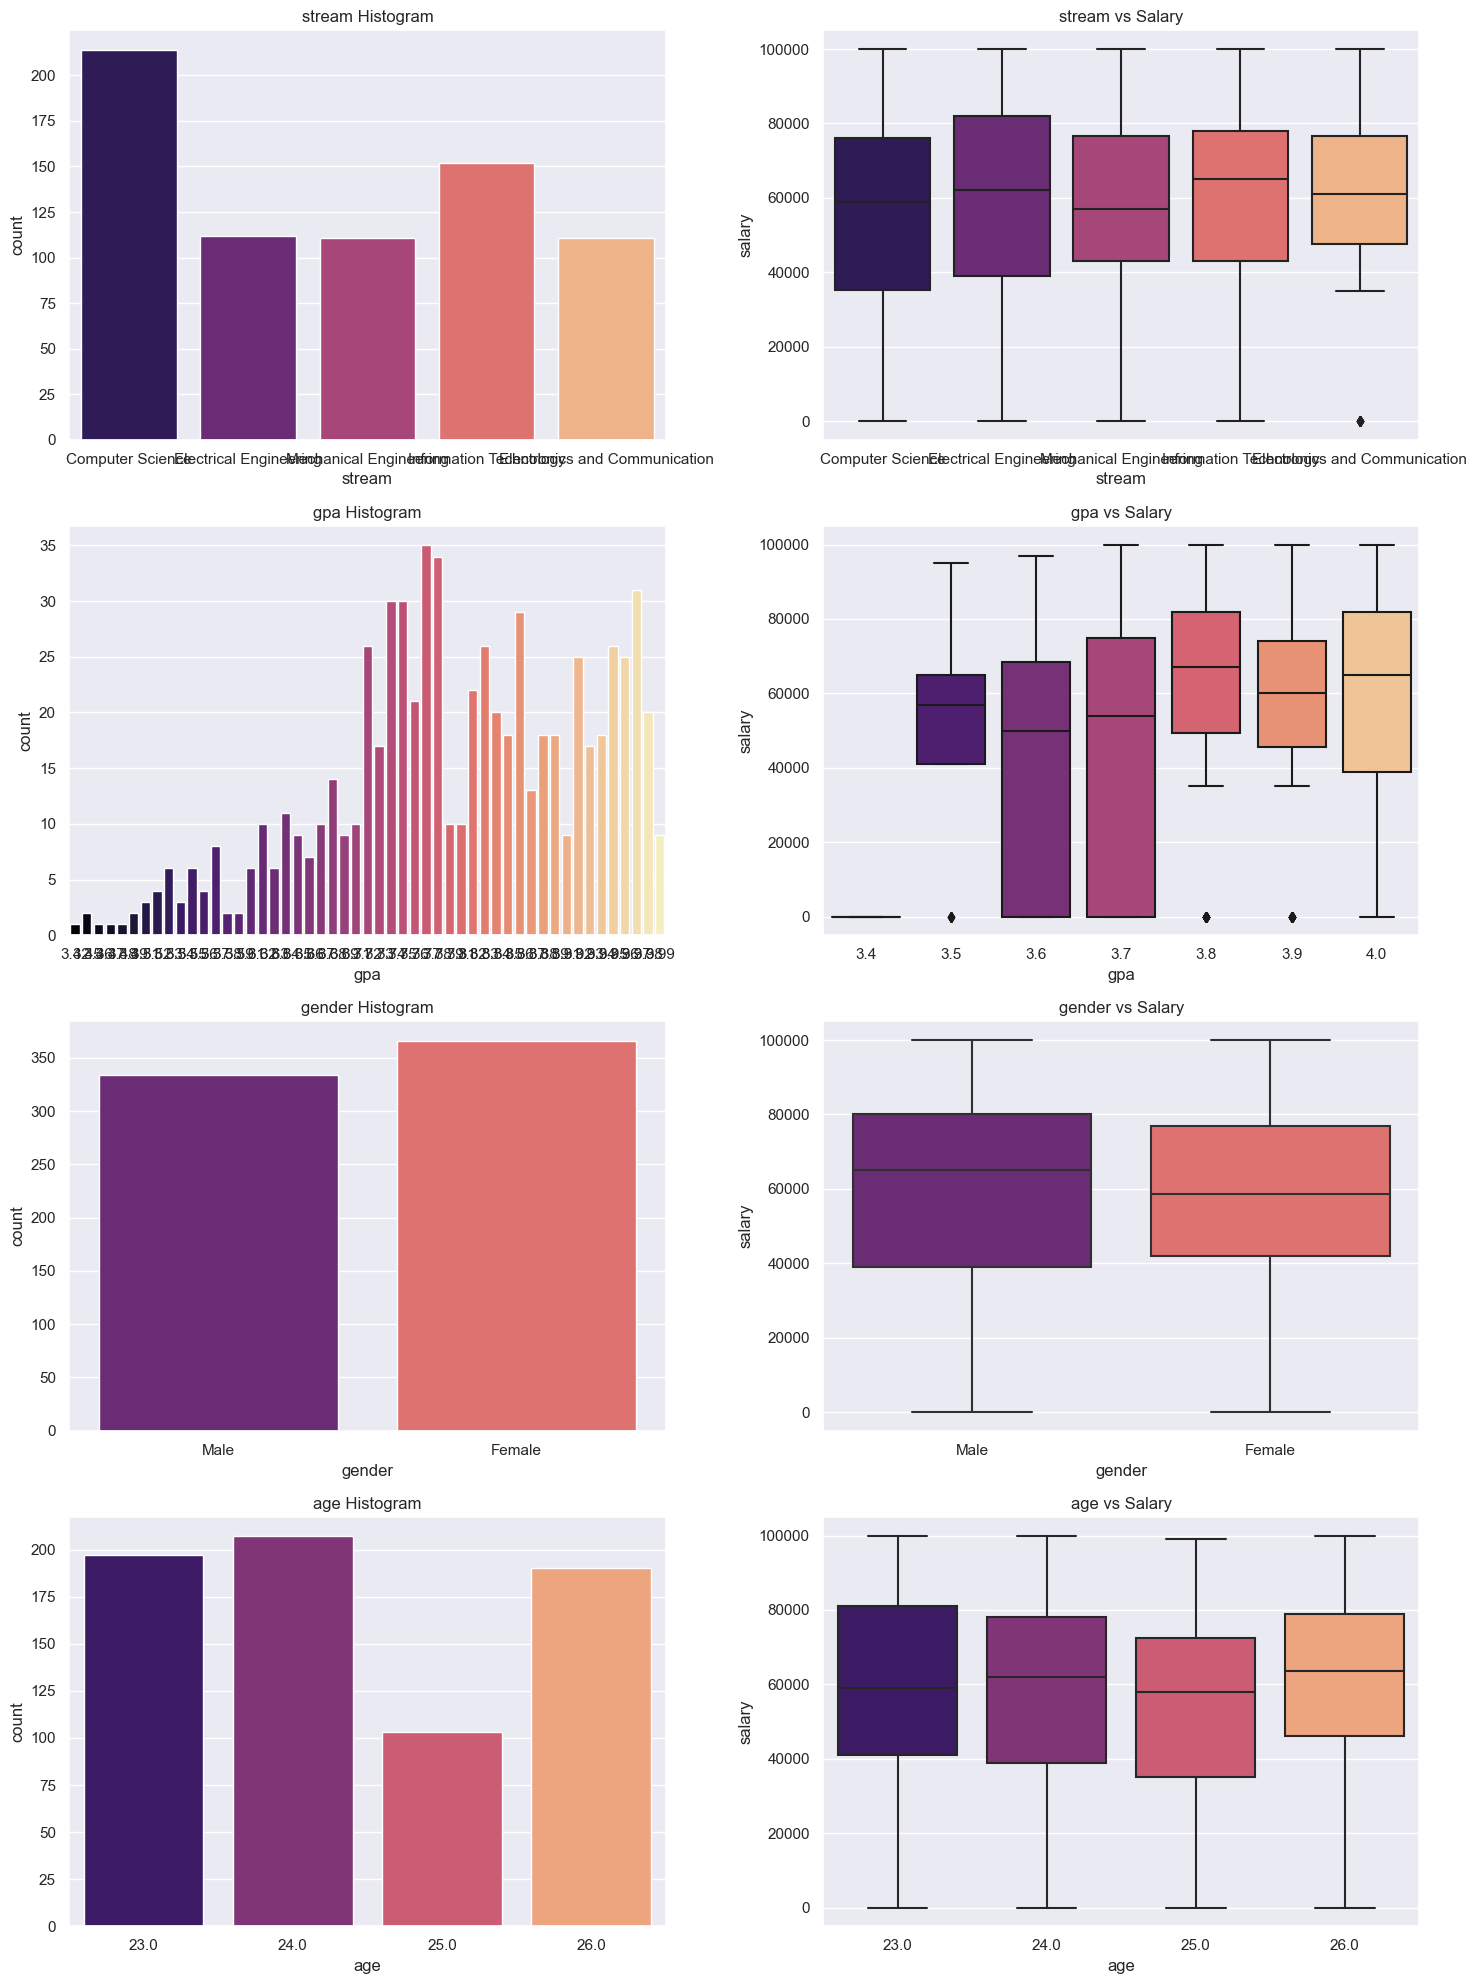

In [13]:
def plot_count(x, fig):
    plt.subplot(4, 2, fig)
    plt.title(x + ' Histogram')
    sns.countplot(df[x], palette=("magma"))
    
    plt.subplot(4, 2, (fig + 1))
    plt.title(x + ' vs Salary')
    # Round off GPA to one decimal place
    df_rounded_gpa = df.copy()
    if x == 'gpa':
        df_rounded_gpa['gpa'] = df_rounded_gpa['gpa'].round(1)
    sns.boxplot(x=df_rounded_gpa[x], y=df_rounded_gpa.salary, palette=("magma"))

plt.figure(figsize=(15, 20))

plot_count('stream', 1)
plot_count('gpa', 3)
plot_count('gender', 5)
plot_count('age', 7)

plt.tight_layout()

C:\Users\Vaishali\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


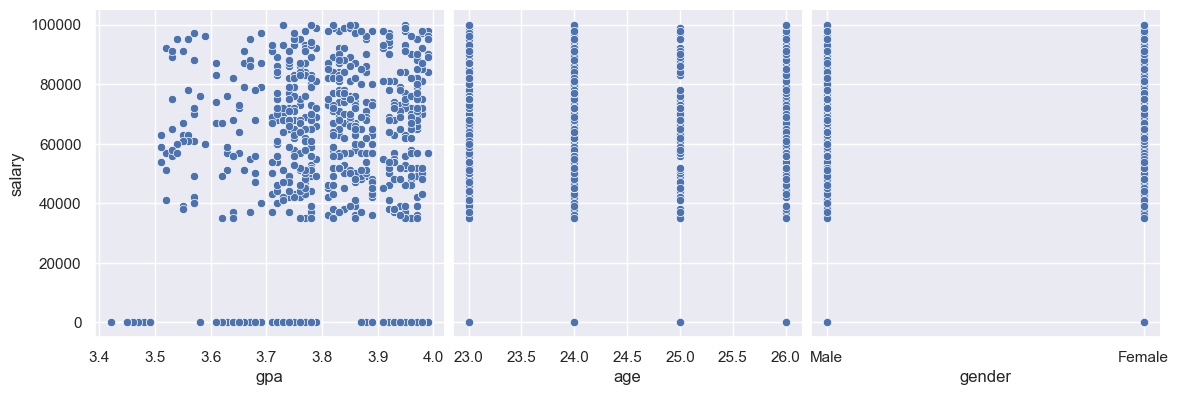

C:\Users\Vaishali\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


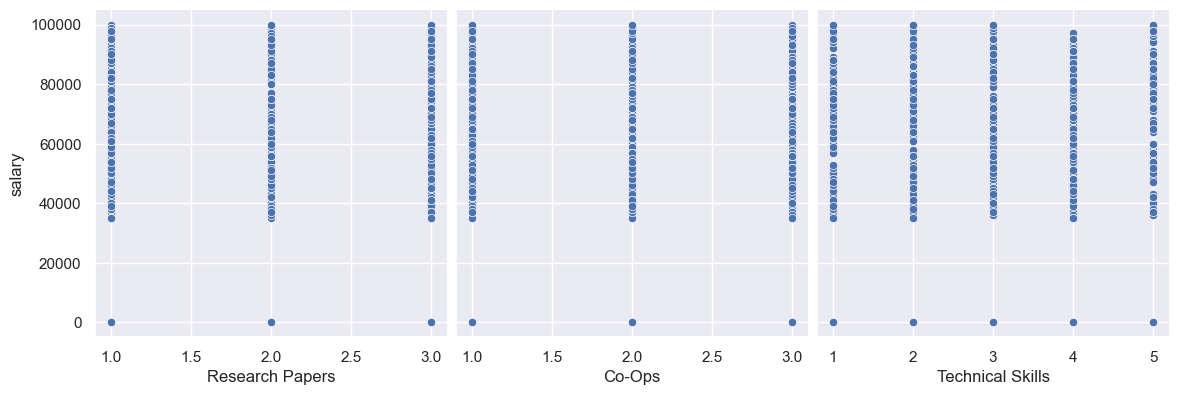

C:\Users\Vaishali\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


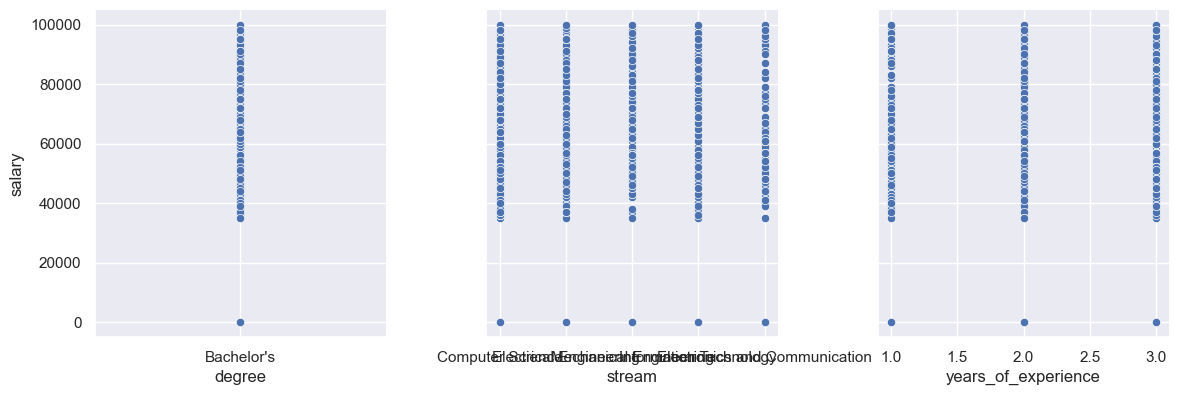

In [14]:
def pp(x,y,z):
    sns.pairplot(df, x_vars=[x,y,z], y_vars='salary',size=4, aspect=1, kind='scatter')
    plt.show()

pp('gpa', 'age', 'gender')
pp('Research Papers', 'Co-Ops', 'Technical Skills')
pp('degree', 'stream', 'years_of_experience')

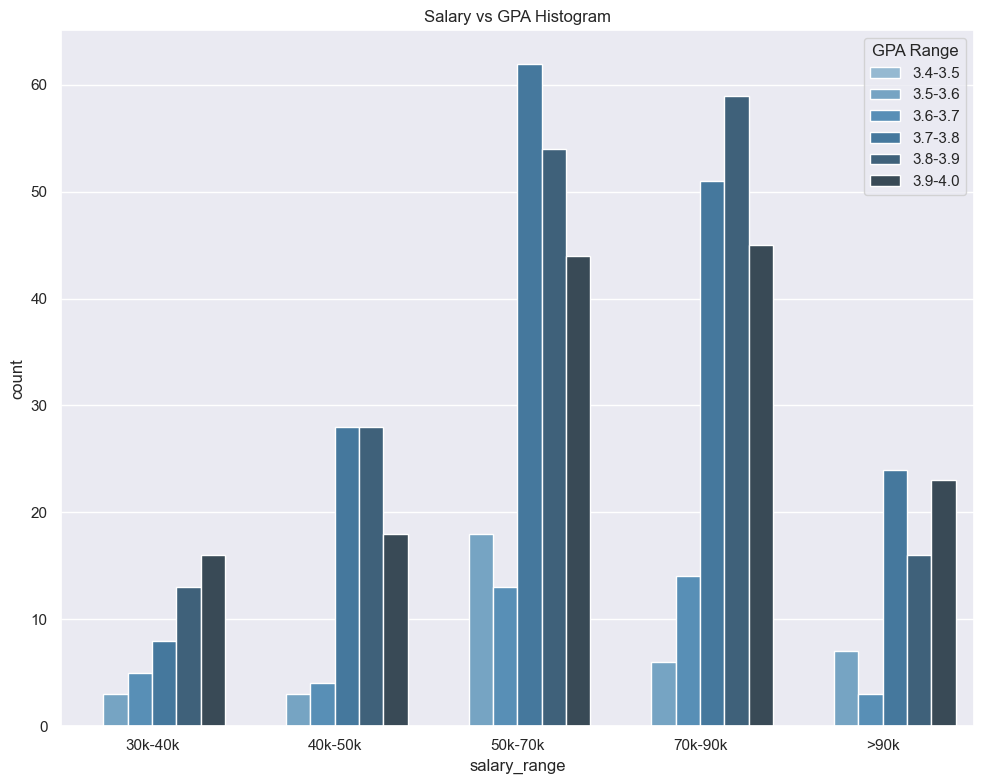

In [15]:
# Assuming 'df.salary' is a continuous variable, we first create a categorical variable for salary ranges
salary_bins = [30000, 40000, 50000, 70000, 90000, 100000]  # Define your own bins here
salary_labels = ['30k-40k', '40k-50k', '50k-70k', '70k-90k', '>90k']  # Adjusted number of labels
df['salary_range'] = pd.cut(df.salary, bins=salary_bins, labels=salary_labels)

# Assuming 'df.gpa' is a continuous variable, we first create a categorical variable for GPA ranges
gpa_bins = [3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0]  # Define your own bins here
gpa_labels = ["3.4-3.5", "3.5-3.6", "3.6-3.7", "3.7-3.8", "3.8-3.9", "3.9-4.0"]  # Adjusted number of labels
df['gpa_range'] = pd.cut(df.gpa, bins=gpa_bins, labels=gpa_labels)

# Set the figure size to be larger
plt.figure(figsize=(10, 8))

# Your existing code with modifications for the new 'salary_range' column
plt.subplot(1,1,1)
plt.title('Salary vs GPA Histogram')
sns.countplot(x='salary_range', hue='gpa_range', data=df, palette='Blues_d')

# Rotate x-axis labels to horizontal
plt.xticks(rotation=0)

# Add a legend
plt.legend(title='GPA Range')

# Automatically adjust the subplot params
plt.tight_layout()

# Display the plot
plt.show()

# DATA PRE - PROCESSING


In [30]:
import pandas as pd

df = pd.read_csv("Final.csv")


df['placement_status'] = df['placement_status'].replace({'Placed': 1, 'Not Placed': 0})
df['gender'] = df['gender'].replace({'Male': 1, 'Female': 0})

# Optionally, print the DataFrame to confirm the changes
print(df.head())

   id             name  gender   age      degree                  stream  \
0   1         John Doe       1  25.0  Bachelor's        Computer Science   
1   2       Jane Smith       0  24.0  Bachelor's  Electrical Engineering   
2   3  Michael Johnson       1  26.0  Bachelor's  Mechanical Engineering   
3   4      Emily Davis       0  23.0  Bachelor's  Information Technology   
4   5      David Brown       1  24.0  Bachelor's        Computer Science   

                            college_name  placement_status  salary   gpa  \
0                     Harvard University                 1   44000  3.78   
1  Massachusetts Institute of Technology                 1   40000  3.69   
2                    Stanford University                 1   71000  3.88   
3                        Yale University                 0       0  3.58   
4                   Princeton University                 1   97000  3.98   

   years_of_experience  Research Papers  Co-Ops  Technical Skills  
0                 

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   700 non-null    int64  
 1   name                 700 non-null    object 
 2   gender               700 non-null    int64  
 3   age                  697 non-null    float64
 4   degree               700 non-null    object 
 5   stream               700 non-null    object 
 6   college_name         698 non-null    object 
 7   placement_status     700 non-null    int64  
 8   salary               700 non-null    int64  
 9   gpa                  695 non-null    float64
 10  years_of_experience  697 non-null    float64
 11  Research Papers      697 non-null    float64
 12  Co-Ops               698 non-null    float64
 13  Technical Skills     698 non-null    float64
dtypes: float64(6), int64(4), object(4)
memory usage: 76.7+ KB


In [32]:
def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

missing(df)

,Missing_Number,Missing_Percent
gpa,5,0.007143
age,3,0.004286
years_of_experience,3,0.004286
Research Papers,3,0.004286
college_name,2,0.002857
Co-Ops,2,0.002857
Technical Skills,2,0.002857
id,0,0.000000
name,0,0.000000
gender,0,0.000000


# The data contains few null values 



*The data contains some null values which we will fill the null values values with mean further before running models on the data.*

*All the missing values are numeric so we will replace them with mean*

In [33]:
# Fill missing values with default values
df['gpa'] = df['gpa'].fillna(df['gpa'].mean())  # Replace missing GPA with the mean GPA
df['salary'] = df['salary'].fillna(df['salary'].median())  # Replace missing salary with the median salary
df['age'] = df['age'].fillna(df['age'].mode()[0])  # Replace missing age with the mode age
df['Research Papers'] = df['Research Papers'].fillna(0)  # Assume missing research papers count as 0
df['college_name'] = df['college_name'].fillna('Unknown')  # Label missing college name as 'Unknown'
df['Co-Ops'] = df['Co-Ops'].fillna(0)  # Assume missing Co-Ops count as 0
df['Technical Skills'] = df['Technical Skills'].fillna(df['Technical Skills'].mean())  # Label missing technical skills as 'None'
df['years_of_experience'] = df['years_of_experience'].fillna(df['years_of_experience'].mean())


# Checking for missing numbers again


In [34]:
df.isnull().sum()

id                     0
name                   0
gender                 0
age                    0
degree                 0
stream                 0
college_name           0
placement_status       0
salary                 0
gpa                    0
years_of_experience    0
Research Papers        0
Co-Ops                 0
Technical Skills       0
dtype: int64

# Dropping numerical variables with zero varaince


In [35]:
df.info()
# Identify numerical variables, considering both integer and float types as numerical
numerical_variables = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Identify categorical variables
categorical_variables = df.select_dtypes(include=['object']).columns.tolist()

# Print the identified variables for confirmation
print("Numerical Variables:", numerical_variables)
print("Categorical Variables:", categorical_variables)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   700 non-null    int64  
 1   name                 700 non-null    object 
 2   gender               700 non-null    int64  
 3   age                  700 non-null    float64
 4   degree               700 non-null    object 
 5   stream               700 non-null    object 
 6   college_name         700 non-null    object 
 7   placement_status     700 non-null    int64  
 8   salary               700 non-null    int64  
 9   gpa                  700 non-null    float64
 10  years_of_experience  700 non-null    float64
 11  Research Papers      700 non-null    float64
 12  Co-Ops               700 non-null    float64
 13  Technical Skills     700 non-null    float64
dtypes: float64(6), int64(4), object(4)
memory usage: 76.7+ KB
Numerical Variables: ['id', 'gen

In [36]:
# Identify numerical variables
numerical_variables = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Drop numerical variables with 0 variance
zero_variance_numerical_variables = []
for i in numerical_variables:
    if df[i].std() == 0:
        zero_variance_numerical_variables.append(i)

df = df.drop(zero_variance_numerical_variables, axis=1)

# Optionally, print the dropped columns for confirmation
print("Dropped columns with zero variance:", zero_variance_numerical_variables)


Dropped columns with zero variance: []


In [37]:
numeric_df = df.select_dtypes(include=["number"])

# Remove the 'id' column
numeric_df = numeric_df.drop(columns=['id'])

# Calculate the standard deviation
std_dev = numeric_df.std()

print(std_dev)

gender                     0.499834
age                        1.161586
placement_status           0.389154
salary                 30840.697438
gpa                        0.122417
years_of_experience        0.776938
Research Papers            0.828666
Co-Ops                     0.825977
Technical Skills           1.380933
dtype: float64


# Dropping Categorical Variables with Zero variance


In [38]:
categorical_variables

['name', 'degree', 'stream', 'college_name']

In [39]:
# Identify categorical variables
categorical_variables = df.select_dtypes(include=['object']).columns.tolist()

# Drop categorical variables with 0 variance
zero_variance_categorical_variables = []
for i in categorical_variables:
    if i in df.columns and len(df[i].value_counts().index) == 1:
        zero_variance_categorical_variables.append(i)

df = df.drop(zero_variance_categorical_variables, axis=1)

# Optionally, print the dropped columns for confirmation
print("Dropped categorical columns with zero variance:", zero_variance_categorical_variables)

Dropped categorical columns with zero variance: ['degree']


In [40]:
df.head()
# Identify categorical variables
categorical_variables = df.select_dtypes(include=['object']).columns.tolist()

# Print the identified categorical variables for confirmation
print("Categorical Variables:", categorical_variables)

# Replace values in the 'Placement_status' column if it exists
if 'Placement_status' in categorical_variables:
    df['Placement_status'] = df['Placement_status'].replace({'Placed': 1, 'Not Placed': 0})

# Optionally, print the DataFrame to confirm the changes
print(df.head())

Categorical Variables: ['name', 'stream', 'college_name']
   id             name  gender   age                  stream  \
0   1         John Doe       1  25.0        Computer Science   
1   2       Jane Smith       0  24.0  Electrical Engineering   
2   3  Michael Johnson       1  26.0  Mechanical Engineering   
3   4      Emily Davis       0  23.0  Information Technology   
4   5      David Brown       1  24.0        Computer Science   

                            college_name  placement_status  salary   gpa  \
0                     Harvard University                 1   44000  3.78   
1  Massachusetts Institute of Technology                 1   40000  3.69   
2                    Stanford University                 1   71000  3.88   
3                        Yale University                 0       0  3.58   
4                   Princeton University                 1   97000  3.98   

   years_of_experience  Research Papers  Co-Ops  Technical Skills  
0                  2.0          

# Dropping Categorical Variables with many levels


In [41]:


# Identify categorical variables
categorical_variables = df.select_dtypes(include=['object']).columns.tolist()

# Identify zero variance categorical variables (for completeness and context)
zero_variance_categorical_variables = []
for i in categorical_variables:
    if len(df[i].value_counts().index) == 1:
        zero_variance_categorical_variables.append(i)

# Update categorical variables list by excluding zero variance variables
categorical_variables = list(set(categorical_variables) - set(zero_variance_categorical_variables))

# Drop high cardinality variables
high_cardinality_categorical_variables = []
for i in categorical_variables:
    if len(df[i].value_counts().index) > 200:
        high_cardinality_categorical_variables.append(i)
df = df.drop(high_cardinality_categorical_variables, axis=1)
print("Dropped high cardinality categorical columns:", high_cardinality_categorical_variables)

Dropped high cardinality categorical columns: []


# Scalling

In [42]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Identify and drop zero variance numerical variables, as previously defined
numerical_variables = list(set(numerical_variables) - set(zero_variance_numerical_variables))

# Convert the numerical variables to a numpy array
array = df[numerical_variables].values 

# Create a StandardScaler instance and fit it to the data
data_scaler = StandardScaler().fit(array) 

# Standardize the numerical variables
data_rescaled = pd.DataFrame(data_scaler.transform(array), columns=numerical_variables)

# Drop the original numerical variables from the dataframe
df = df.drop(numerical_variables, axis=1)

# Concatenate the standardized numerical variables back with the original dataframe
df = pd.concat([df, data_rescaled], axis=1)
df.head()

,name,stream,college_name,Co-Ops,age,Research Papers,gender,salary,Technical Skills,years_of_experience,id,gpa,placement_status
0,John Doe,Computer Science,Harvard University,0.015577,0.509520,1.204172,1.046809,-0.349556,-0.669641,-0.229146,-1.729578,-0.181489,0.477567
1,Jane Smith,Electrical Engineering,Massachusetts Institute of Technology,0.015577,-0.351987,-0.003450,-0.955284,-0.479348,1.504357,-1.517170,-1.724629,-0.917208,0.477567
2,Michael Johnson,Mechanical Engineering,Stanford University,0.015577,1.371027,1.204172,1.046809,0.526536,0.055025,1.058877,-1.719681,0.635976,0.477567
3,Emily Davis,Information Technology,Yale University,-1.195976,-1.213495,-0.003450,-0.955284,-1.777263,0.779691,-0.229146,-1.714732,-1.816419,-2.093947
4,David Brown,Computer Science,Princeton University,1.227130,-0.351987,-1.211072,1.046809,1.370181,0.055025,-0.229146,-1.709783,1.453441,0.477567


In [43]:
# import pandas as pd

# # Update the list of categorical variables to exclude high cardinality variables
# categorical_variables = list(set(categorical_variables) - set(high_cardinality_categorical_variables))

# # Create dummy variables for the remaining categorical variables
# dummy_variables = pd.get_dummies(df[categorical_variables], drop_first=True) 

# # Drop the original categorical variables from df
# df = df.drop(categorical_variables, axis=1) 

# # Concatenate the dummy variables back into df
# df = pd.concat([df, dummy_variables], axis=1)


In [44]:
df["salary"] = df["salary"].astype(int)


In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Define the input variables and target variable
input_variables = list(set(df.columns) - set(['salary']))

X = df[input_variables]
Y = df['salary']

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


# Fitting Models

Feature Selection for our model

* Feature selection methods are intended to reduce the number of input variables to those that are believed to be most useful to a model in order to predict the target variable.

In [46]:
df

,name,stream,college_name,Co-Ops,age,Research Papers,gender,salary,Technical Skills,years_of_experience,id,gpa,placement_status
0,John Doe,Computer Science,Harvard University,0.015577,0.509520,1.204172,1.046809,0,-0.669641,-0.229146,-1.729578,-0.181489,0.477567
1,Jane Smith,Electrical Engineering,Massachusetts Institute of Technology,0.015577,-0.351987,-0.003450,-0.955284,0,1.504357,-1.517170,-1.724629,-0.917208,0.477567
2,Michael Johnson,Mechanical Engineering,Stanford University,0.015577,1.371027,1.204172,1.046809,0,0.055025,1.058877,-1.719681,0.635976,0.477567
3,Emily Davis,Information Technology,Yale University,-1.195976,-1.213495,-0.003450,-0.955284,-1,0.779691,-0.229146,-1.714732,-1.816419,-2.093947
4,David Brown,Computer Science,Princeton University,1.227130,-0.351987,-1.211072,1.046809,1,0.055025,-0.229146,-1.709783,1.453441,0.477567
...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Lucas Taylor,Computer Science,University of Washington,-1.195976,-1.213495,-0.003450,1.046809,0,0.779691,1.058877,1.709783,0.554230,0.477567
696,Emma Martinez,Electronics and Communication,University of California--Berkeley,-1.195976,1.371027,1.204172,-0.955284,0,0.779691,1.058877,1.714732,1.126455,0.477567
697,Aiden Davis,Computer Science,University of Illinois--Urbana-Champaign,-1.195976,-0.351987,1.204172,1.046809,1,1.504357,1.058877,1.719681,0.554230,0.477567
698,Mia Wilson,Electrical Engineering,University of Colorado--Boulder,-1.195976,-1.213495,-1.211072,-0.955284,0,0.779691,-0.229146,1.724629,-0.508475,0.477567


In [47]:
numerical_cols=df.select_dtypes(exclude=['object']).columns
X=df[numerical_cols].drop('salary',axis=1)
y=df['salary']

# Recursive feature elimination (RFE) with random forest

In [48]:
from sklearn import preprocessing

X = df.apply(lambda col: preprocessing.LabelEncoder().fit_transform(col))
X = X.drop(['salary'], axis=1)
y = df['salary']


# Create the RFE object and rank each pixel

In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

# Dropping specified columns
columns_to_drop = ['name', 'stream', 'college_name', 'id', 'salary']
X = df.drop(columns=columns_to_drop)

# Ensure 'salary' is the target variable
y = df['salary']

# Split the dataset into training and testing sets if not already done
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the RandomForestRegressor
clf_rf_3 = RandomForestRegressor()

# Apply RFE with RandomForestRegressor as the estimator
rfe = RFE(estimator=clf_rf_3, n_features_to_select=15, step=1)
rfe = rfe.fit(X_train, y_train)

# Print the chosen best 15 features
print('Chosen best features by RFE:', X_train.columns[rfe.support_])


Chosen best features by RFE: Index(['Co-Ops', 'age', 'Research Papers', 'gender', 'Technical Skills',
       'years_of_experience', 'gpa', 'placement_status'],
      dtype='object')


In [50]:
features=list(X.columns[rfe.support_])
print(features)

['Co-Ops', 'age', 'Research Papers', 'gender', 'Technical Skills', 'years_of_experience', 'gpa', 'placement_status']


# Data Modelling and Evaluation

In [51]:
x = df[features]
y = df['salary']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


* Linear Regression

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Initialize the Linear Regression model
lreg = LinearRegression()

# Fit the model to the training data
lreg.fit(x_train, y_train)

# Predict on the training and testing sets
y_train_pred = lreg.predict(x_train)
y_test_pred = lreg.predict(x_test)

# Evaluate the model's performance on the testing set using R^2 score
print("Model Predictive Accuracy: {:.2%}".format(r2_score(y_test, y_test_pred)))


Model Predictive Accuracy: 69.14%


* Decsision Tree Regressor

In [53]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import pandas as pd

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize the Decision Tree Regressor with a random state for reproducibility
dt_regressor = DecisionTreeRegressor(random_state=0)

# Fit the model to the training data
dt_regressor.fit(X_train, Y_train)

# Predict on both training and test sets
Y_train_pred = dt_regressor.predict(X_train)
Y_test_pred = dt_regressor.predict(X_test)

# Evaluate the model’s predictive accuracy using the R2 score
performance_score = dt_regressor.score(X_test, Y_test)
print(f"Model Predictive Accuracy: {performance_score:.2%}")


Model Predictive Accuracy: 35.31%


* Random Forest regressor

In [57]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initializing and fitting the RandomForestRegressor with the corrected criterion parameter
Rf = RandomForestRegressor(n_estimators=15,
                           criterion='squared_error',  # Updated criterion parameter
                           random_state=20,
                           n_jobs=-1)  # Use all available processors for training

# Fitting the model to the training data
Rf.fit(x_train, y_train)

# Making predictions on both the training and testing datasets
Rf_train_pred = Rf.predict(x_train)
Rf_test_pred = Rf.predict(x_test)

# Computing and printing the R2 score to evaluate the model's performance
print("Model Predictive Accuracy: {:.2%}".format(r2_score(y_test, Rf_test_pred)))


Model Predictive Accuracy: 64.87%


* Gradient Boosting Regressor

In [58]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pandas as pd

features=list(X.columns[rfe.support_])

X = df[features]
y = df['salary']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initializing the Gradient Boosting Regressor
gbm_regressor = GradientBoostingRegressor(random_state=42)

# Fitting the model to the training data
gbm_regressor.fit(X_train, y_train)

# Making predictions on the test dataset
y_test_pred = gbm_regressor.predict(X_test)

# Evaluating the model using R2 score
r2_test_score = r2_score(y_test, y_test_pred)
print(f"Model Predictive Accuracy: {r2_test_score:.2%}")


Model Predictive Accuracy: 66.26%


* XGboost

In [73]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Assuming 'df' is your DataFrame and 'features' contains the feature columns
X = df[features]
y = df['salary']  # Ensure 'salary' is the target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initializing the XGBoost Regressor
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.9, learning_rate=0.9,
                                 max_depth=10, alpha=5, n_estimators=10, random_state=42)

# Fitting the model to the training data
xgb_regressor.fit(X_train, y_train)

# Making predictions on the test dataset
y_test_pred = xgb_regressor.predict(X_test)

# Evaluating the model using R2 score
r2_test_score = r2_score(y_test, y_test_pred)
print(f"Model Predictive Accuracy: {r2_test_score:.2%}")


Model Predictive Accuracy: 70.55%
